In [1]:
# import numpy to help in modelling and pandas for data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define euclidean distance function to compute the distances
def euclidean(x1, x2):
    euc = np.sqrt(np.sum(x1 - x2) ** 2)
    return euc

In [3]:
''' Create Kmeans class which takes the data as input and predicts using unsupervised learning.
'''
class Kmeans:
    def __init__(self, K=5, max_iters=100, centers=False):
        self.K = K
        self.max_iters = max_iters
        self.centers = centers
        
        # list of clusters
        self.clusters = [[] for _ in range(self.K)]
        
        #list of centroids
        centroids = []
    # define predict function    
    def predict(self, X_test):
        self.X = X_test
        self.num_samples, self.num_feats = X_test.shape
        
        # initialize the centroids
        rand_idx_samp = np.random.choice(self.num_samples, self.K, replace=False)
        
        # initilize centroids
        self.centroids = [self.X[idx] for idx in rand_idx_samp]
        
            
        # optimization
        for _ in range(self.max_iters):
            # update clusters
            self.clusters = self.build_clusters(self.centroids)
            
            # update centroids
            prev_cent = self.centroids
            self.centroids = self.get_cents(self.clusters)
            
            # check convergence
            if self.is_conv(prev_cent, self.centroids):
                break
        if self.centers == True:
            return self.centroids
        else:
            # return labels clusters
            return self.get_labels(self.clusters)
    
    # get labels function
    def get_labels(self, clusters):
        # create empty labels list
        labels = np.empty(self.num_samples)
        
        for clus_idx, clust in enumerate(clusters):
            for samp in clust:
                labels[samp] = clus_idx
                
        return labels
    
    # function to get convergency 
    def is_conv(self, prev_cent, centroids):
        # get distances and if the converge which is equal to zero
        dists = [euclidean(prev_cent[i], centroids[i]) for i in range(self.K)]
        
        return sum(dists) == 0 
        
    # build clusters function 
    def build_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        
        for idx, samp in enumerate(self.X):
            cent_idx = self.nearest_cent(samp, centroids)
            clusters[cent_idx].append(idx)
            
        return clusters
    
    # helper function for nearest centroid
    def nearest_cent(self, sample, centroids):
        # get the distances using euclidean function
        dist = [euclidean(sample, point) for point in centroids]
        nearest_cent = np.argmin(dist)
        return nearest_cent
    
    # get centroids function 
    def get_cents(self, clusters):
        # initialize with zeros
        cents = np.zeros((self.K, self.num_feats))
        
        for clus_idx, clust in enumerate(clusters):
            clust_mean = np.mean(self.X[clust], axis=0)
            cents[clus_idx] = clust_mean
        return cents

In [4]:
#data = np.genfromtxt(r"iris.txt", delimiter=",", replace_space=" ")

In [5]:
data = pd.read_csv("iris.data", delimiter=",", header=None)

In [6]:
#rename specific column names
data.rename(columns = {0:'length', 1:'width',2:'height',3:'color',4:'flower'}, inplace = True)

In [7]:
data

,length,width,height,color,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
X = data.replace((['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']),[0,1,2])
y = data['flower']

In [9]:
X

,length,width,height,color,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


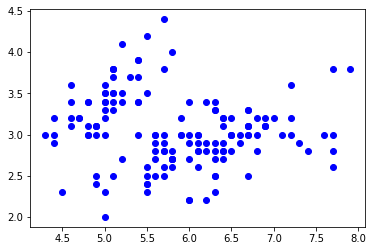

In [10]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = 'b')
plt.show()

In [11]:
def find_best_clusters(data, min_K,max_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(min_K, max_K):
        k_values.append(k)
        kM = Kmeans(K=k, max_iters=20, centers=True)
        yp= kM.predict(np.array(data))
        clusters_centers.append([np.max(y) for y in yp])
    
    return clusters_centers, k_values

In [12]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [13]:
clusters_centers, k_values = find_best_clusters(X, 1,7)

C:\Users\jose\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jose\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [14]:
ccs = []
for c in clusters_centers:
    ccs.append(max(c))

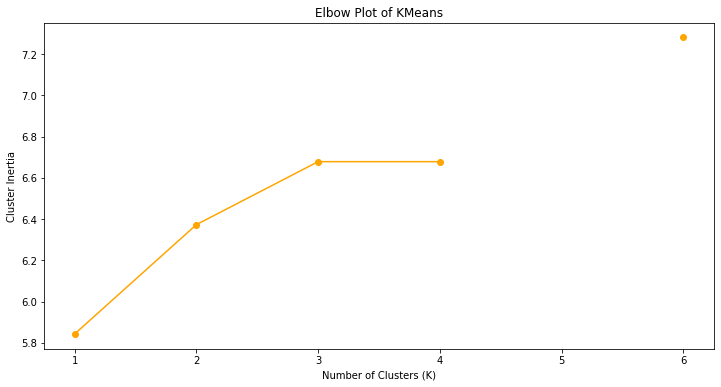

In [15]:
generate_elbow_plot(ccs, k_values)

#### From the graph above k=3

In [16]:
km = Kmeans(K=3, max_iters=100)

In [17]:
y_pred = km.predict(np.array(X))

In [18]:
y_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
pred = [] 
for yp in y_pred:
    lbs = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
    for v, l in lbs.items():
        if yp == v:
            pred.append(l)

In [31]:
def acc(y_true, y_pred):
    n = len(y_true)
    count = 0
    for i in range(n):
        if y_true[i] != y_pred[i]:
            count += 1
    return count/n

In [32]:
accy = acc(y,pred)

In [33]:
accy * 100

69.33333333333334